# A notebook to demonstrate simple Linear Regression.

I want to be able to demonstrate a basic understanding of Linear Regression.

In [2]:
# Import required modules and libraries:
import numpy as np  # linear algebra
import pandas as pd  # data processing, reading in the csv file
import matplotlib.pyplot as plt  # data visualization

from sklearn.model_selection import train_test_split  # split data into a test and training 

from sklearn.linear_model import LinearRegression  # Library for running the linear regression

## Import data from the downloaded csv file

In [3]:
filename = './kc_house_data.csv'
data = pd.read_csv(filename)

In [11]:
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Correlation Between Features vs Price

In [19]:
# Determine the difference between features vs price within the dataset
features = data.iloc[:,3:].columns.tolist()
print(features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [20]:
price = data.iloc[:,2].name
print(price)

price


## Determine the value of the various features based off price

In [22]:
from scipy.stats import pearsonr # used to factor the correlation of features and price
corr = {}
for i in features:
    temp = data[[i,price]]
    x1 = temp[i].values
    x2 = temp[price].values
    key = i + ' vs ' + price
    corr[key] = pearsonr(x1,x2)[0]

In [23]:
data_corr = pd.DataFrame(corr, index=['Value']).T
data_corr.loc[data_corr['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


## Seperating two different columns for analysing

In [24]:
x = data[['sqft_living']]
y = data[['price']]

## Running the Linear Regression

In [25]:
# Splitting the different X and Y into train groups and tests groups respectively
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=1/3, random_state=0)

# Making use of the LinearRegression library and all of its calculations
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visuallising the Data

Text(0.5, 1.0, 'SqFt Living vs Price (Train set)')

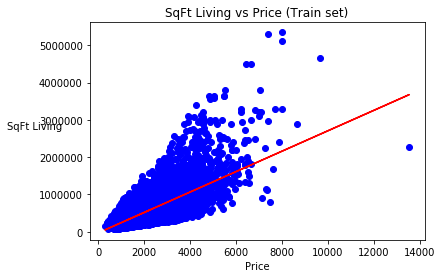

In [26]:
plt.scatter(X_train,y_train,color = 'blue')
plt.plot(X_train,lin_reg.predict(X_train),color = 'red')
plt.xlabel('Price')
plt.ylabel('SqFt Living',rotation = 0)
plt.title("SqFt Living vs Price (Train set)")

Text(0.5, 1.0, 'SqFt Living vs Price (Test set)')

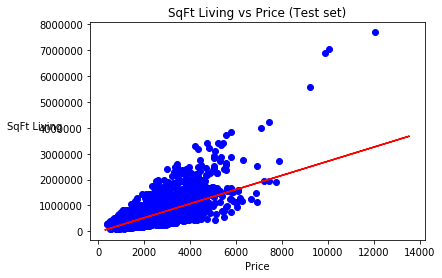

In [27]:
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_train,lin_reg.predict(X_train),color = 'red')
plt.xlabel('Price')
plt.ylabel('SqFt Living',rotation = 0)
plt.title("SqFt Living vs Price (Test set)")

## How well did this model perform using the R_squared score?

In [28]:
from sklearn.metrics import r2_score  # import module
r2_score(y_test, lin_reg.predict(X_test))  # run score

0.5000063123558641